# ANOVA


Notebook created for Regression in Psychology [PSYCH–GA.2229](https://docs.google.com/document/d/10AW7g92O6BtX61kXVIkHtL4j_k3P_G5f/edit?usp=sharing&ouid=100340169590558171318&rtpof=true&sd=true) graduate level course at New York University by [Dr. Madalina Vlasceanu](https://www.mvlasceanu.com/)

This content is Open Access (free access to information and unrestricted use of electronic resources for everyone).

Sources:
- Navarro, D. (2013). Learning statistics with R: https://learningstatisticswithr.com/
- Gureckis, 2018
https://teaching.gureckislab.org/fall22/labincp/intro.html

## ANOVA
- Widely used tool in statistics = analysis of variance
- ANOVA is concerned with investigating differences in means, despite its name

One-way ANOVA (between subjects ANOVA):
- Tests if there is a difference between several independent groups
- Similar to the t-test, but more than 2 groups/levels
- ANOVA with 2 groups/levels is just a Student t-test

Factorial ANOVA
- Same as one-way ANOVA, but with more than one factor
- With 2 factors, it's called a two-way ANOVA
- Each factor has multiple levels

Repeated measures ANOVA (within subjects ANOVA):
- Same as factorial ANOVA but the levels are not independent (same subjects)
- Tests if there is a difference in pre-post measurements

Mixed ANOVA (within-between ANOVA):
- Has at least one between and at least one within subjects factor

In [1]:
# conda install pingouin

In [2]:
# import libraries

import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import anova
import pingouin as pg
from scipy.stats import levene

In [3]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/data_ANOVA.xlsx
# df = pd.read_excel('data_ANOVA.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/data_ANOVA.xlsx'
df = pd.read_excel(url)

df.head(10)

,partnum,RdeltaB,pop_unpop,sci_anec,convincing,cond,itemnum,age,party,twitter,trust
0,0,4.0,1,1,66,3,0,18,1,0,95
1,0,26.0,0,0,66,0,1,18,1,0,95
2,0,0.0,0,0,56,0,2,18,1,0,95
3,0,-5.0,1,1,56,3,3,18,1,0,95
4,0,4.0,1,1,61,3,4,18,1,0,95
5,0,-31.0,1,1,58,3,5,18,1,0,95
6,0,-1.0,0,1,68,2,6,18,1,0,95
7,0,22.0,1,1,56,3,7,18,1,0,95
8,0,4.0,1,1,58,3,8,18,1,0,95
9,0,6.0,1,1,8,3,9,18,1,0,95


In [4]:
# Right now data is in long format
# Group and average data within participant

AVDATA = df.groupby(["partnum"], as_index=False).mean()
AVDATA.head()

,partnum,RdeltaB,pop_unpop,sci_anec,convincing,cond,itemnum,age,party,twitter,trust
0,0,1.90625,0.50000,0.53125,46.12500,1.56250,15.5,18.0,1.0,0.0,95.0
1,1,2.09375,0.46875,0.37500,53.40625,1.21875,15.5,19.0,2.0,1.0,76.0
2,2,5.34375,0.65625,0.46875,48.03125,1.59375,15.5,18.0,1.0,1.0,86.0
3,3,-7.78125,0.46875,0.34375,6.00000,1.15625,15.5,22.0,1.0,0.0,95.0
4,4,6.09375,0.59375,0.37500,48.37500,1.34375,15.5,19.0,3.0,0.0,76.0


## One way ANOVA

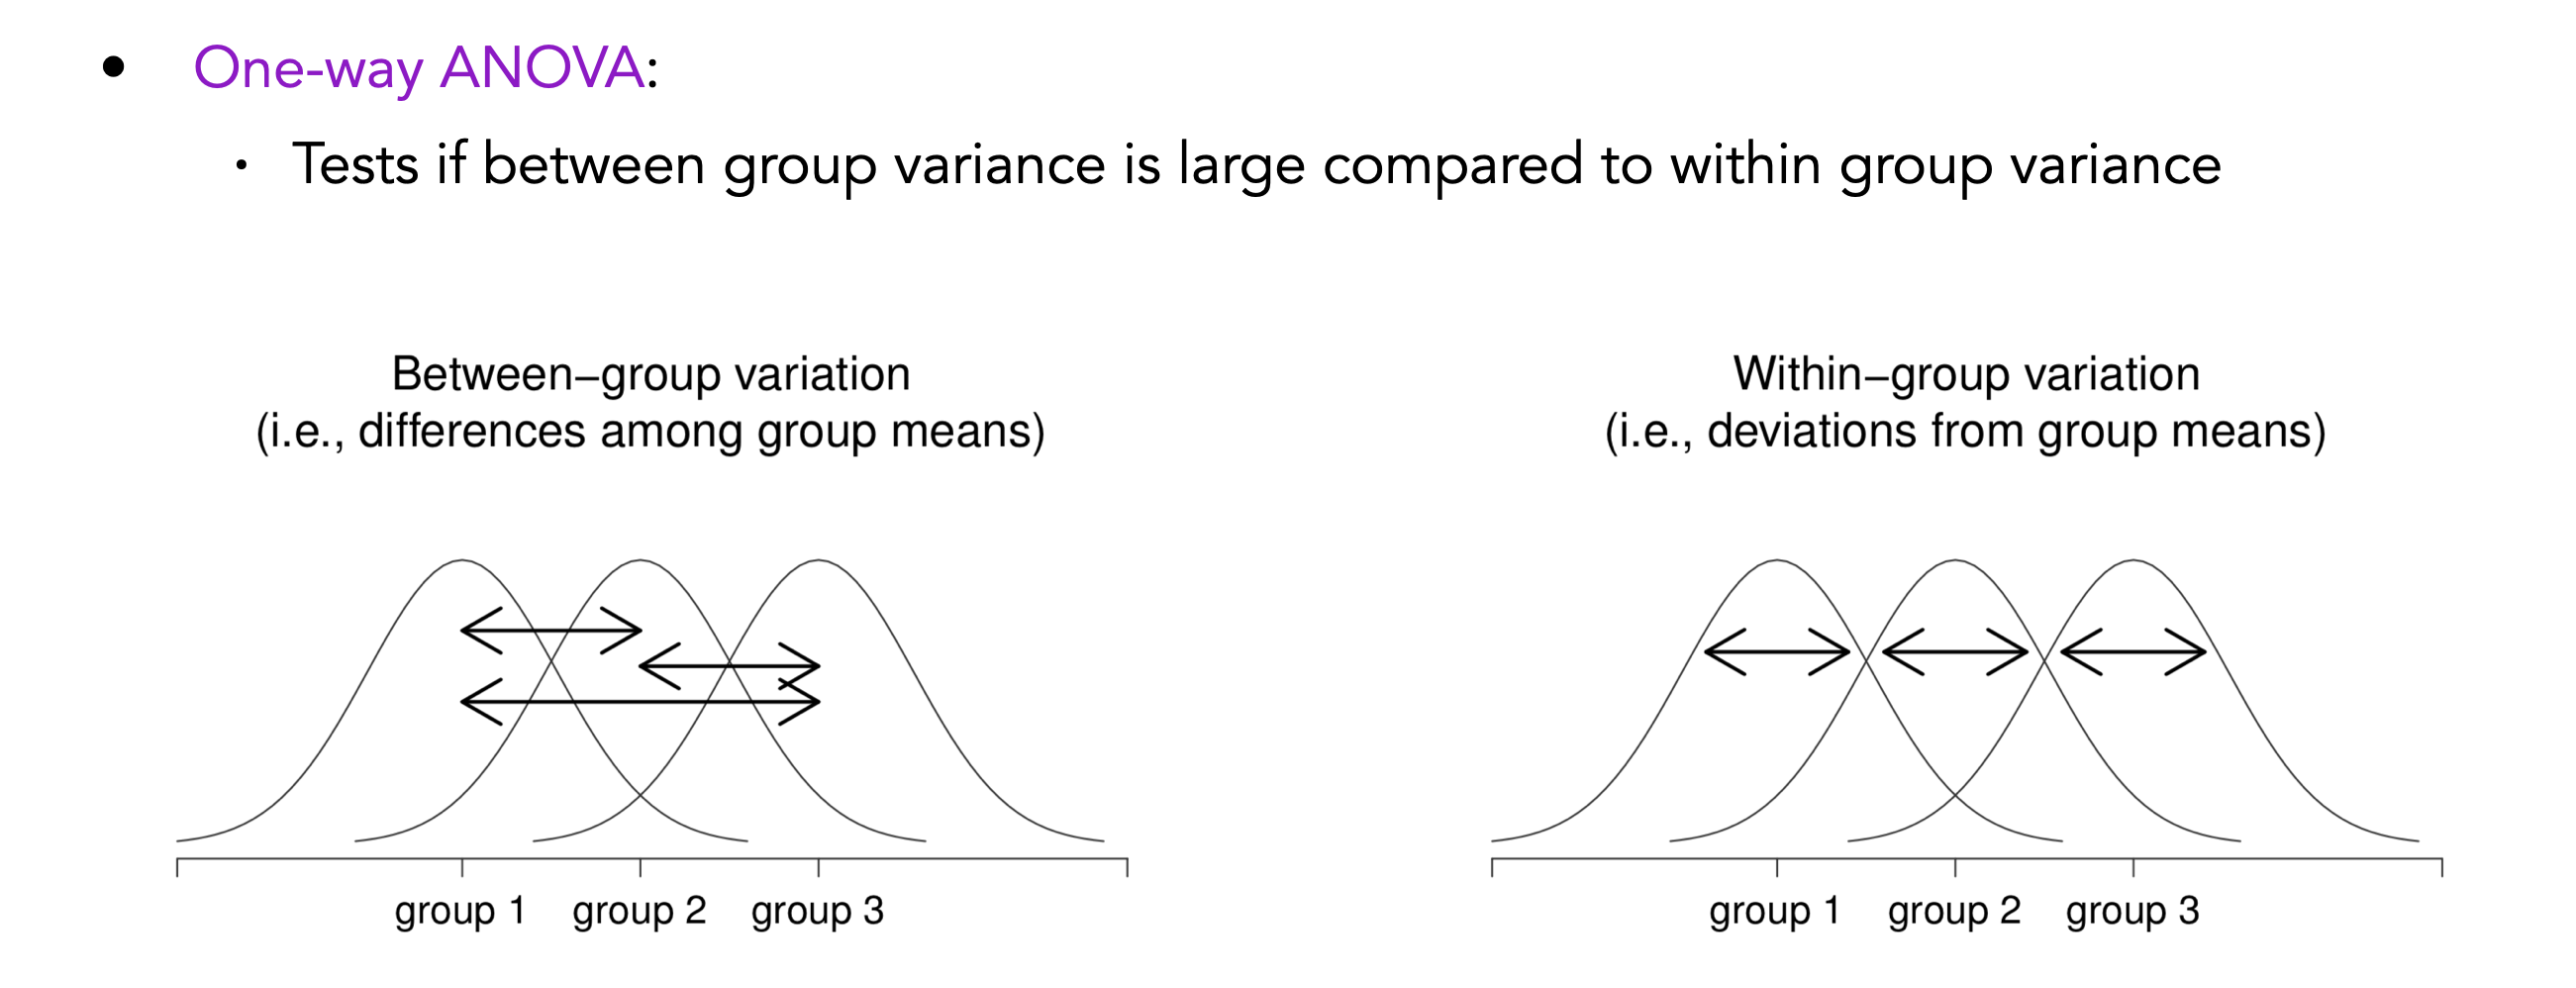

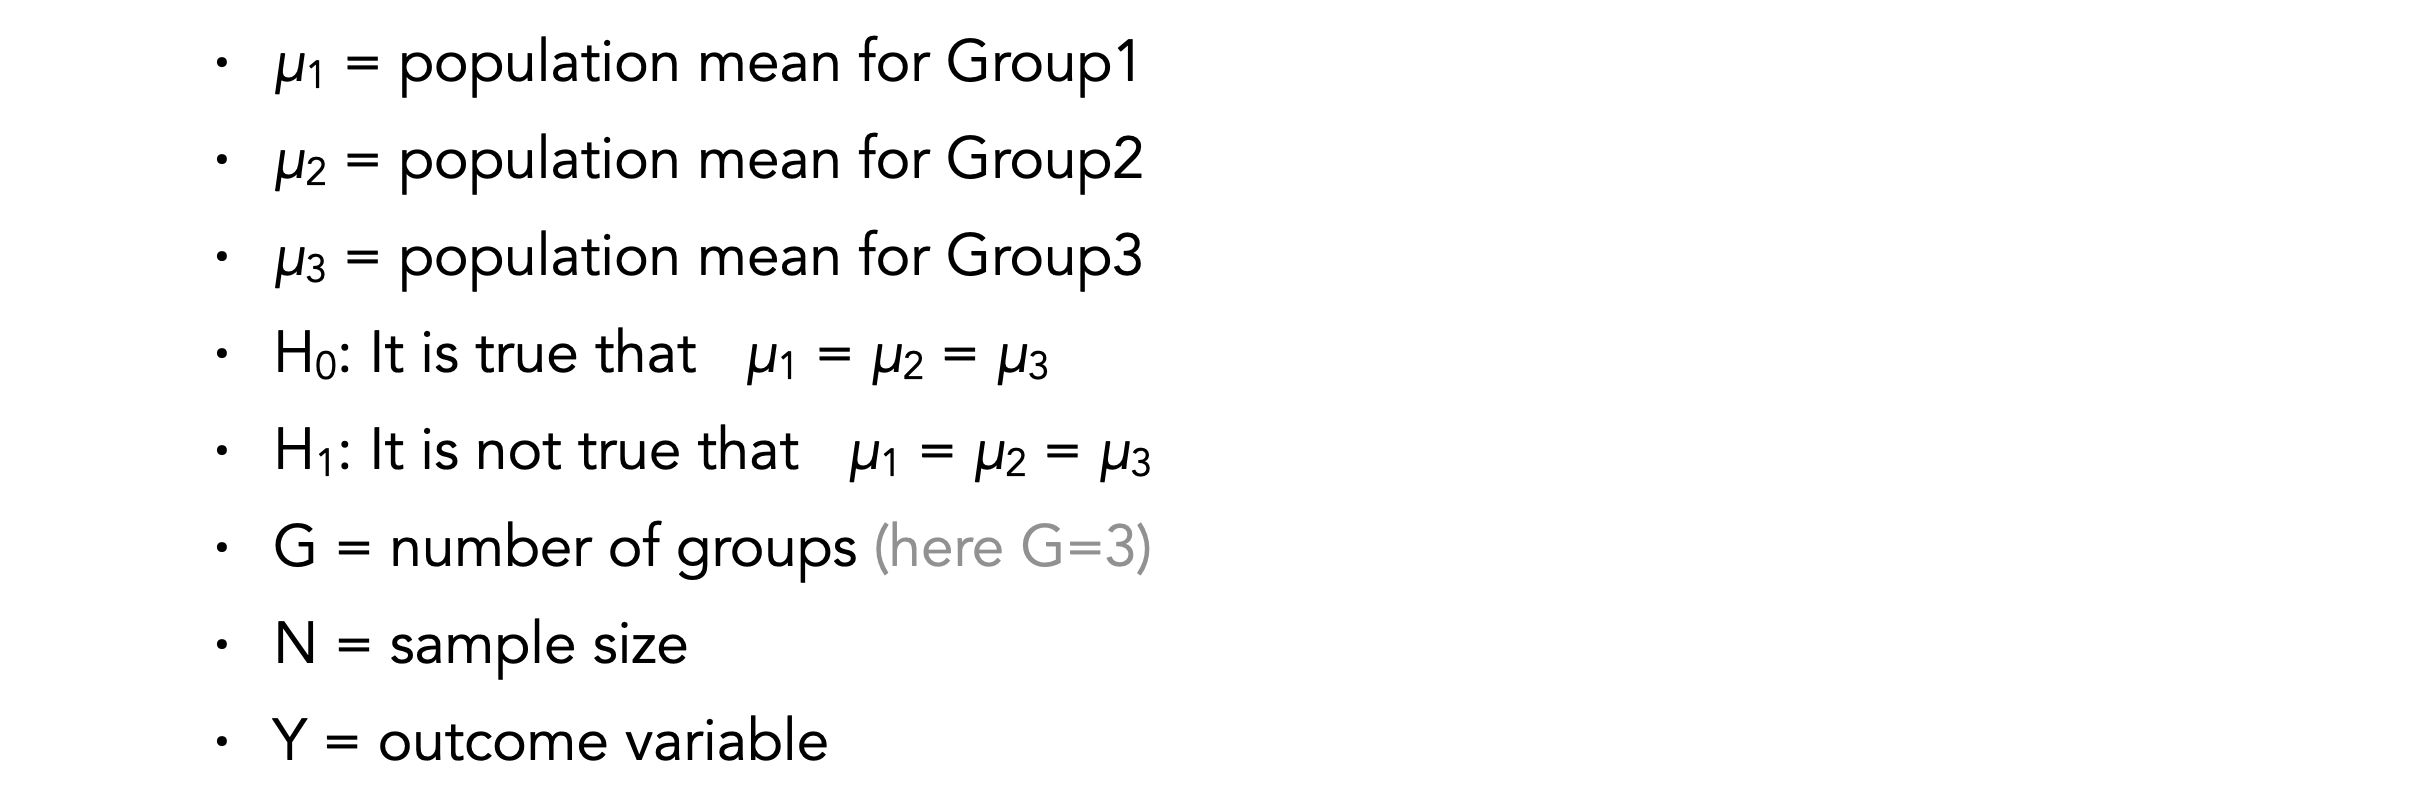

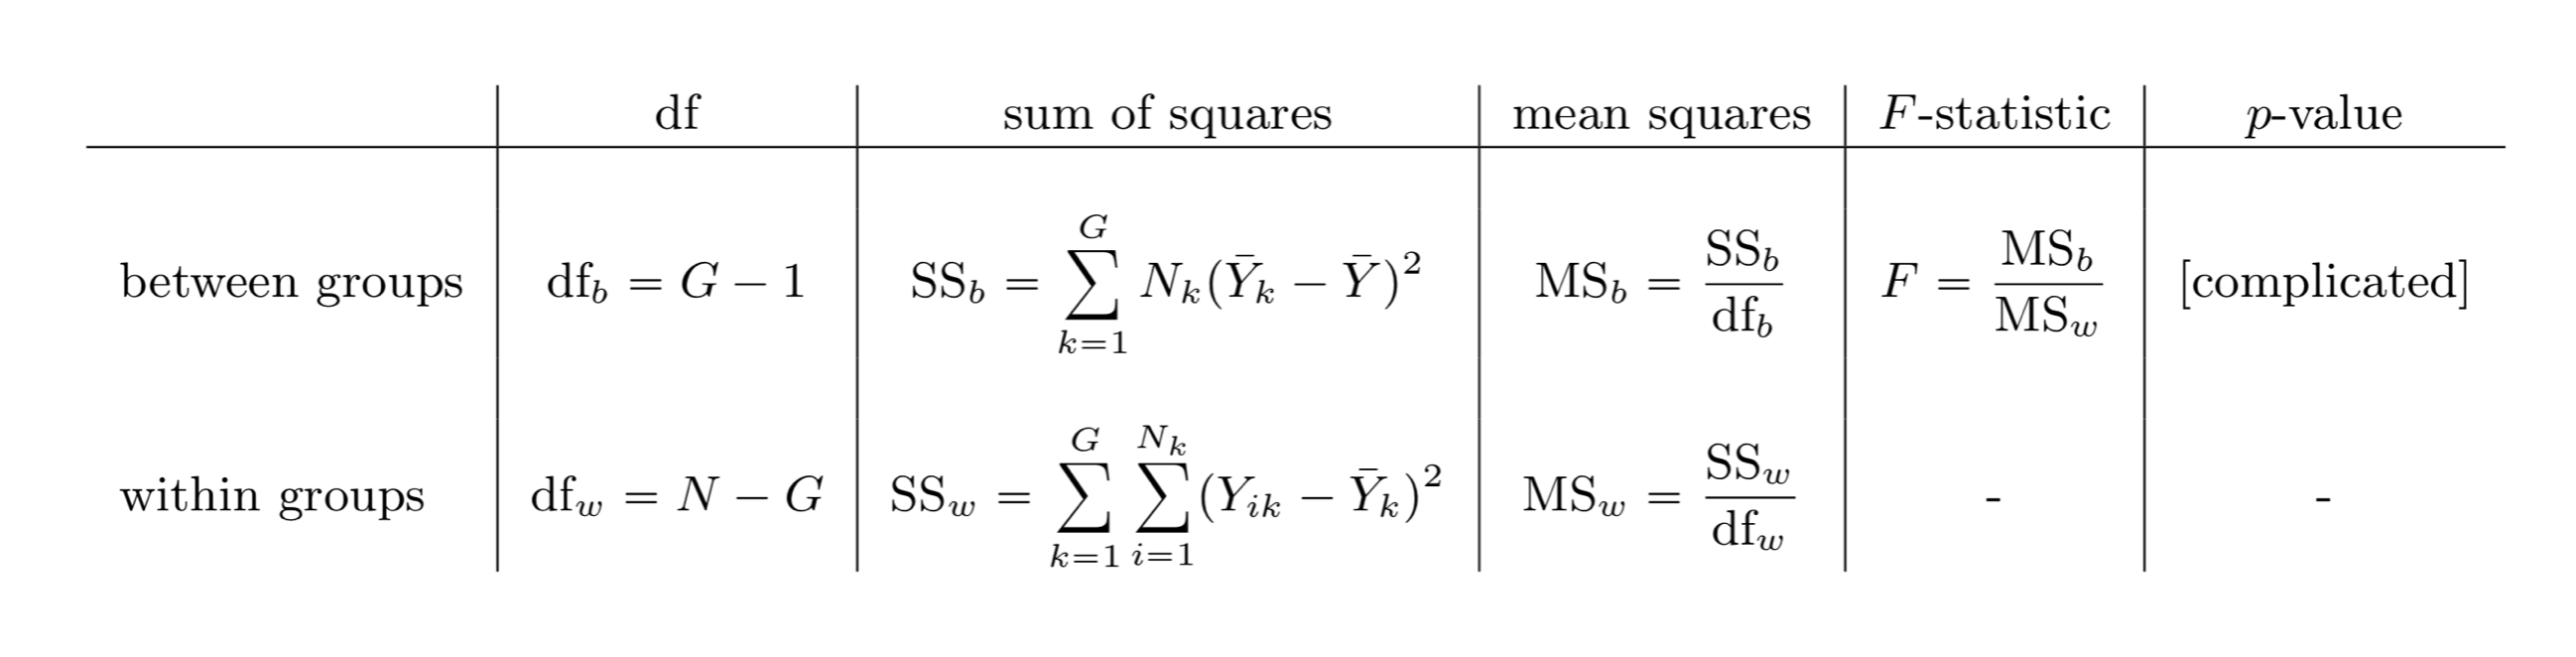

### Effect size

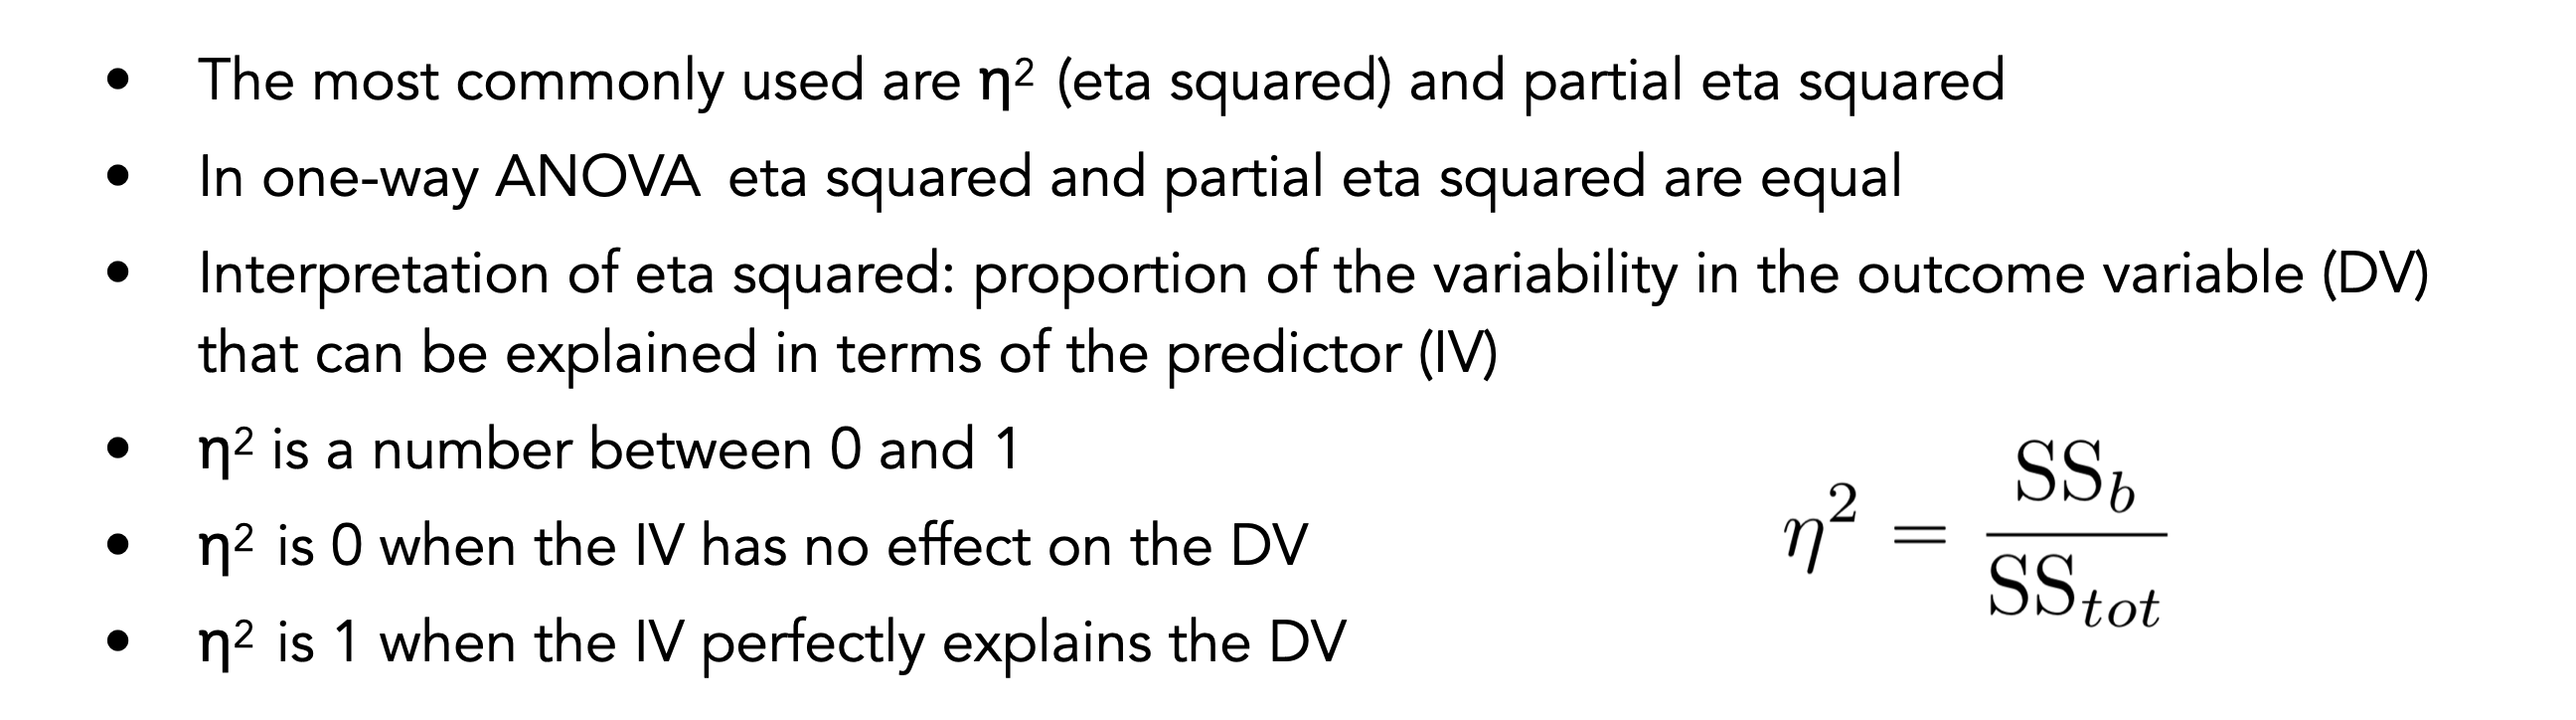

Degrees of freedom:

- Df = number of data points minus (N) number of constraints (G) they need to satisfy
- Df between groups = G – 1
- Df within groups = N – G

F statistic

A larger F means between group variance is large compared to within; thus larger F means more evidence against the null.
F distribution is always one sided, so we’re only interested in the upper tail:

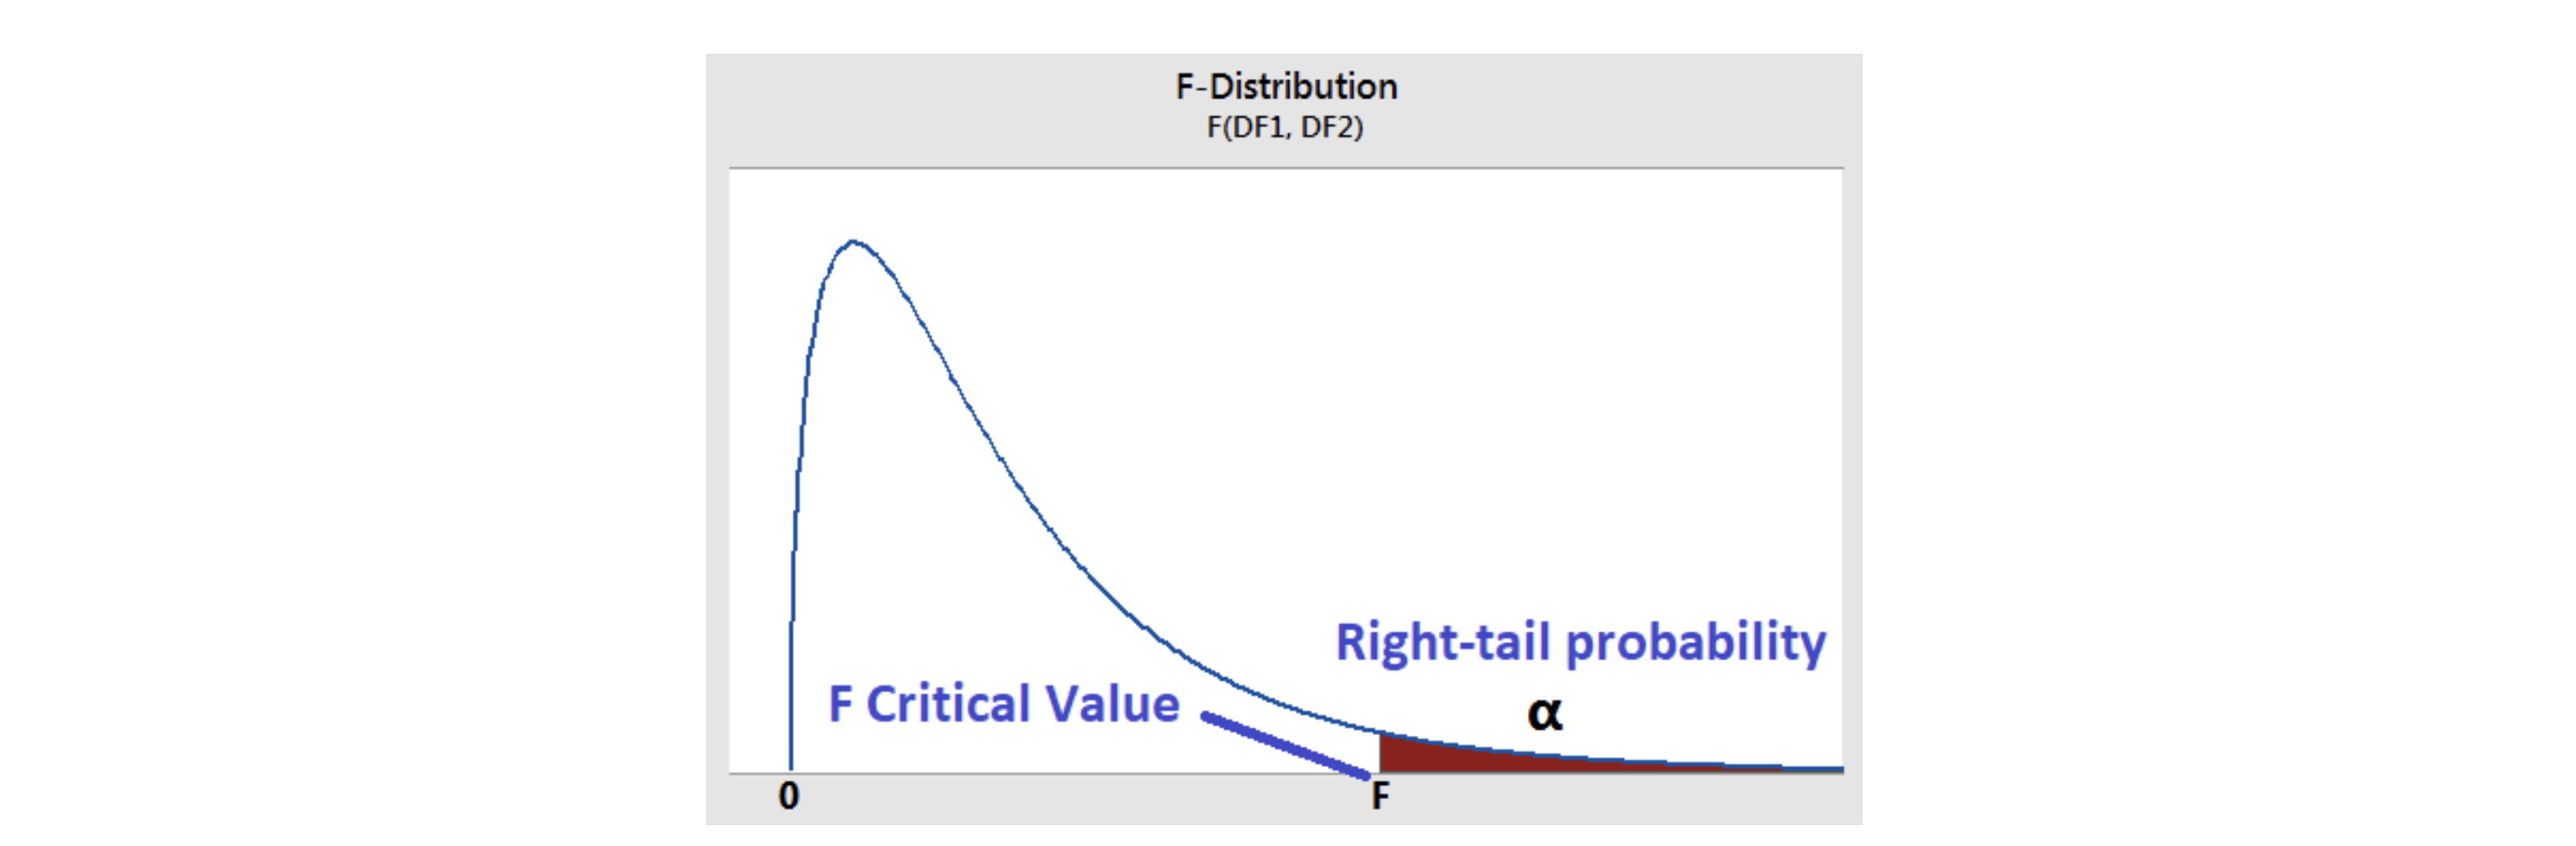

### Example

In this dataset we collected participants' party affiliation (1=Democrat, 2=Republican, 3=Independent).
We also assessed participants' rational belief updating (RdeltaB)
We want to test whether there is a difference in how people rationally update beliefs as a function of their political ideology (party identity).

In other words, is there a difference in rational updating between Democrats, Republicans, and Independents?
Because we have 3 groups we can't run an independent sample ttest (2 groups).
We can run a one way ANOVA.

[Text(0, 0, 'Dem'), Text(1, 0, 'Rep'), Text(2, 0, 'Ind')]

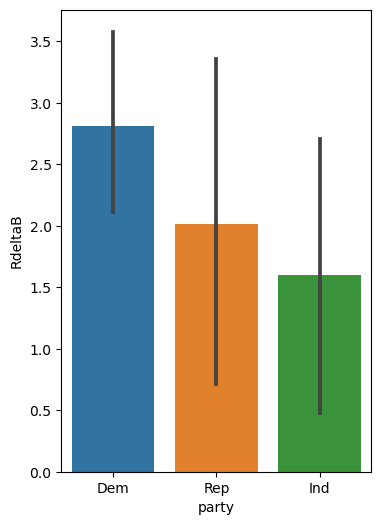

In [5]:
# First, let's look at the data

fig, ax = plt.subplots(1,1, figsize=(4,6))
sns.barplot(x='party', y="RdeltaB", data=AVDATA, ax=ax)
ax.set_xticklabels(['Dem', 'Rep', 'Ind'])

(0.0, 5.0)

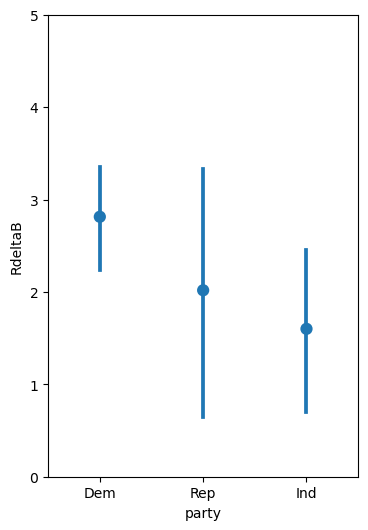

In [6]:
# another way of plotting the same data:
fig, ax = plt.subplots(1,1, figsize=(4,6))
sns.pointplot(data=df, x="party", y="RdeltaB", join=False)
ax.set_xticklabels(['Dem', 'Rep', 'Ind'])
plt.ylim(0,5)

In [7]:
# Run the one way ANOVA
# the pengouin function anova takes as inputs the DV (outcome variable), the between subject factor (independent variable), and dataframe
# the output is the degrees of freedom, F statistic, p value, and eta square (effect size)

aov = pg.anova(dv='RdeltaB', between='party', data=AVDATA)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,party,2,197,1.604089,0.203688,0.016024


Report result:

“A one-way ANOVA showed a non-significant effect of political party on rational belief updating (F(2,197)=1.60, p=.203, np2=0.01).”

Because the ANOVA was not significant, you cannot run pairwise comparisons between the groups.

If the ANOVA was significant, you could have run pairwise comparisons between the 3 groups, in posthoc comparisons (adjusting for multiple comparisons), to see which group is different from which.

### PostHoc tests

A significant ANOVA still doesn’t tell you which group is different from which, just that at least one of the groups is not like the others (omnibus).

To see which group is different from which, you can run pairwise t-tests (but only if the ANOVA was significant).

When running post hoc analyses, you need to control for the number of t-tests you’re running, by adjusting α=.05. This is called a correction for multiple comparisons:
1. Bonferroni correction: divide α by number of tests you run, or equivalently, multiply each p by the number of tests (very conservative)
2. Holm correction: the biggest p remains unchanged, the second biggest is doubles, the third biggest is tippled, etc.



### Assumptions of one-way ANOVA


1. Data are normal (the residuals are assumed to be normally distributed). If data are not normal, run a Kruskal-Wallis rank sum test instead!
2. Data are independently sampled (knowing one residual tells you nothing about another residual). This is violated when design is repeated measures, in which case you should run a repeated measures ANOVA (see below).
3. Variance is the same for all groups. You can check if the 3rd assumption is satisfied with a Levene test or a Bartlett test.
If this assumption is violated, run a Welch one-way test instead!


In [8]:
# quantitatively test whether a variable is normally distributed using the Shapiro test
# if this test is significant, then the variable is not normally distributed

shapiro_test = stats.shapiro(AVDATA['RdeltaB'])
shapiro_test

ShapiroResult(statistic=0.95280522108078, pvalue=3.5508132896211464e-06)

In [9]:
# since the Shapiro test is significant, the data are not normal, so the first assumption of the ANOVA is violated
# let's run a Kruskal-Wallis rank sum test instead, which is the non-parametric version of the one way ANOVA

stats.kruskal(AVDATA.query('party==1')['RdeltaB'], AVDATA.query('party==2')['RdeltaB'], AVDATA.query('party==3')['RdeltaB'])

KruskalResult(statistic=5.694980882552614, pvalue=0.057989666895812406)

In [10]:
# Let's run a Levene test to see if the variance of the 3 groups is the same
# if Levene test is significant (p<0.05) it means the populations do not have equal variances

stat, p = levene(AVDATA.query('party==1')['RdeltaB'], AVDATA.query('party==2')['RdeltaB'], AVDATA.query('party==3')['RdeltaB'])
p

0.6481042984174628

In [11]:
# in this example the 3rd assumption is not violated because the Levene test above was not significant.
# but if it was significant, you should run a Welch one way test instead of the one way ANOVA:

pg.welch_anova(dv='RdeltaB', between='party', data=AVDATA)

,Source,ddof1,ddof2,F,p-unc,np2
0,party,2,57.555739,1.562015,0.218472,0.016024


## Two-way ANOVA (factorial ANOVA)

Same as one-way ANOVA, but with 2 grouping variables (factors).
Each factor can have multiple levels.

Example: We want to test whether party affiliation (a factor with 3 levels: 1=Democrat, 2=Republican, 3=Independent) AND twitter (a factor with 2 levels: 1=yes, the participant has a Twitter account, 0=not on Twitter) matter in how people rationally update beliefs.

This is a 2 by 3 factorial ANOVA. This means that there are 2*3=6 subgroups of participants (Democrats who have Twitter, Democrats who don't, Republicans who have Twitter....)

<Axes: xlabel='party', ylabel='RdeltaB'>

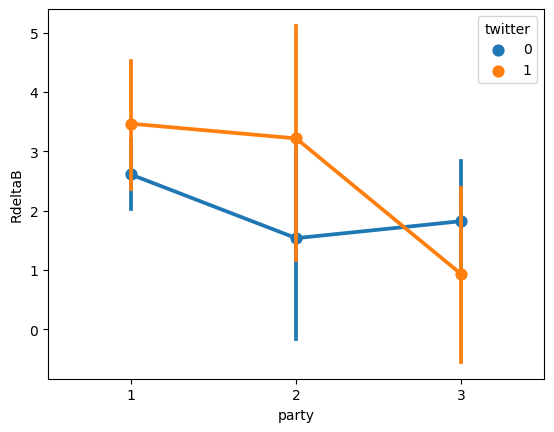

In [12]:
sns.pointplot(data=df, x="party", y="RdeltaB", hue="twitter")

In [13]:
# Run the two way ANOVA

aov = pg.anova(dv='RdeltaB', between=['party', 'twitter'], data=AVDATA)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,party,58.937272,2.0,29.468636,1.622495,0.200073,0.016452
1,twitter,8.849378,1.0,8.849378,0.487232,0.486000,0.002505
2,party * twitter,27.901997,2.0,13.950998,0.768119,0.465290,0.007857
3,Residual,3523.534001,194.0,18.162546,NaN,NaN,NaN


- First the output shows the main effects of each factor (party and twitter).
Then, the output shows the interaction between the two factors. If the interaction is significant, you can start doing posthoc independent sample t-test comparisons (adjusting for multiple comparisons), to see which of the 6 groups has the highest rational updating mean.


- In a factorial ANOVA, the effect size η2 (eta squared) of Factor A is the proportion of variance in the outcome variable that can be accounted for by the main effect of Factor A. The effect size partial η2 (partial eta squared) of Factor A is the proportion of variance in the outcome variable that can be accounted for by the main effect of Factor A while ignoring other effects in the model.

Report result:

“A two-way factorial ANOVA with rational updating as the dependent variable and party affiliation (Democrat, Republican, Independent) and twitter usage (yes, no) as between subject factors, showed a non-significant main effect of political party on rational belief updating (F(2,194)=1.62, p=.20, np2=0.01), a non-significant main effect of twitter usage (F(1,194)=0.48, p=.48, np2=0.002) and a non-significant party by twitter interaction (F(2,194)=0.76, p=.46, np2=0.007).”

### Interactions

Formally, an interaction between A and B is said to occur whenever the effect of Factor A is different, depending on the levels of Factor B.

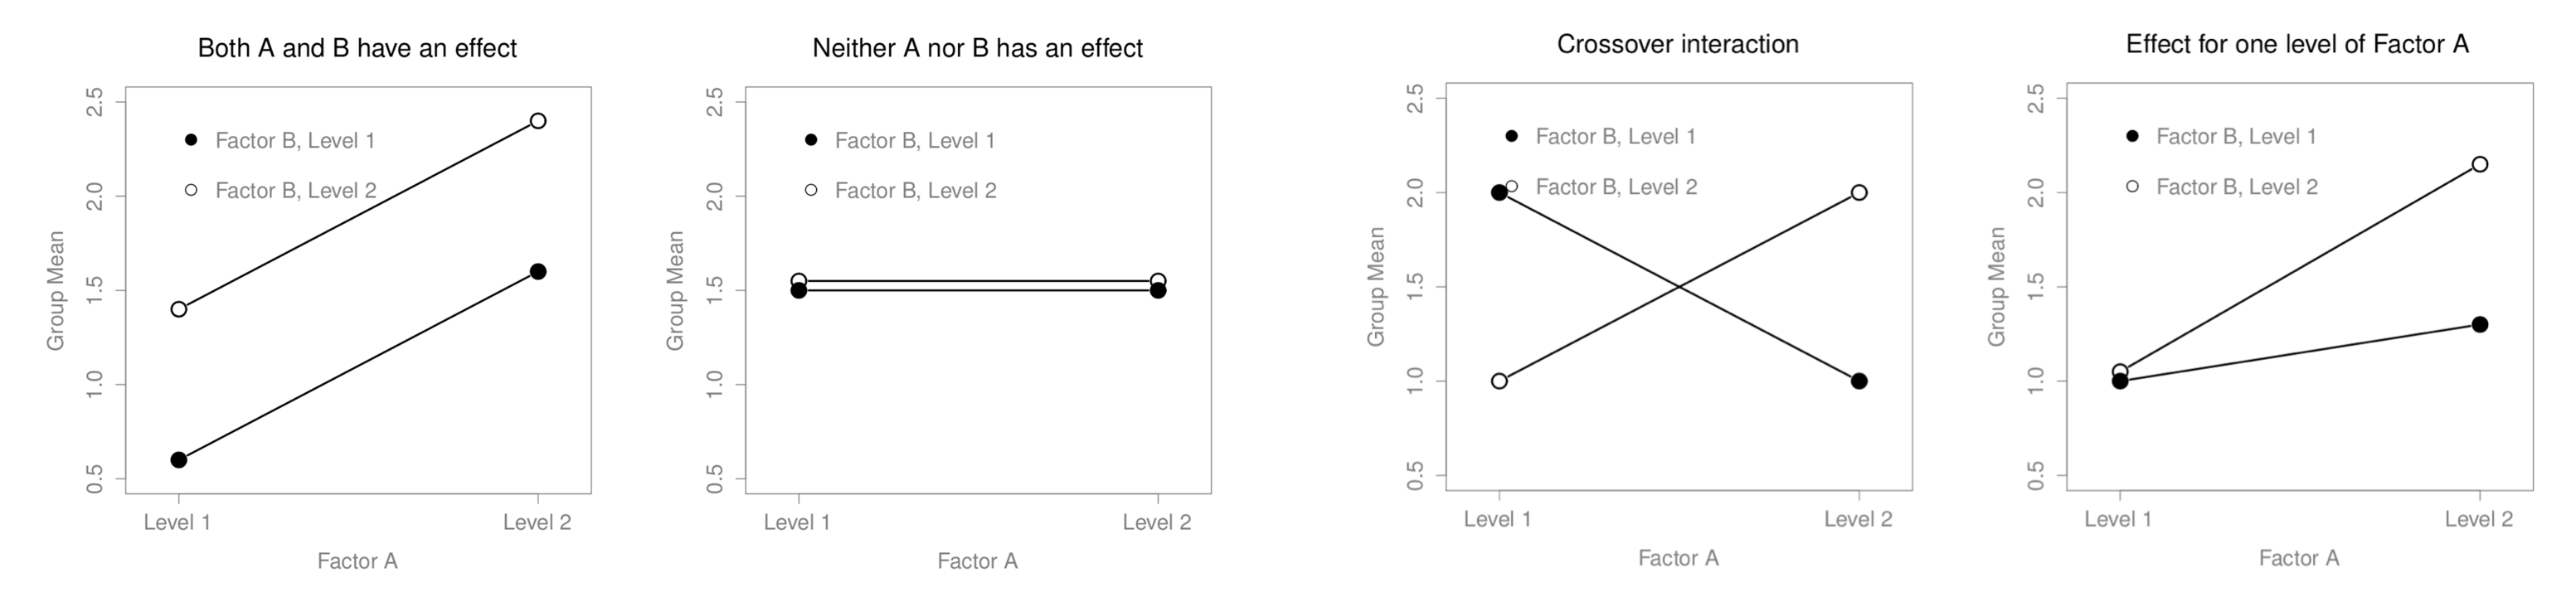

## Repeated Measures ANOVA

A one-way RM-ANOVA with 2 levels is equivalent to paired-samples t-test.

In the RM-ANOVA, the independent variable is a within-subjects factor (grouping variable).

Each factor can have multiple levels.

Example: In a 2 by 2 repeated measures design, I show participants Tweets that differ on popularity (first factor) such that some Tweets are popular and some are not (2 levels). The Tweets also differ on type (second factor) such that some Tweets are scientific and some are anecdotal (2 levels). In this fully crossed design, participants see multiple Tweets in all 4 (within subject) conditions:
1. Popular and Anecdotal
2. Unpopular and Anecdotal
3. Popular and Scientific
4. Unpopular and Scientific

Because this is a within subject design (one participant sees each of these 4 types of Tweets), and because there are more than 2 conditions (for 2 conditions we would use the paired t-test), we use the repeated measures ANOVA.

The question is whether people rationally update their beliefs to different degrees as a function of seeing evidence in one of these 4 conditions. Does Tweet popularity matter? Does type matter? Is there an optimal combination (e.g., popular and scientific) that leads to most updating?

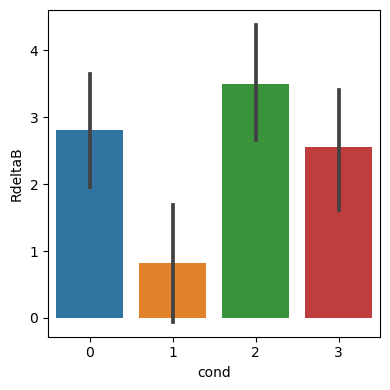

In [14]:
# Here is the rational updating in the 4 (within subject) conditions:

fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.barplot(x='cond', y="RdeltaB", data=df, ax=ax)
plt.tight_layout()

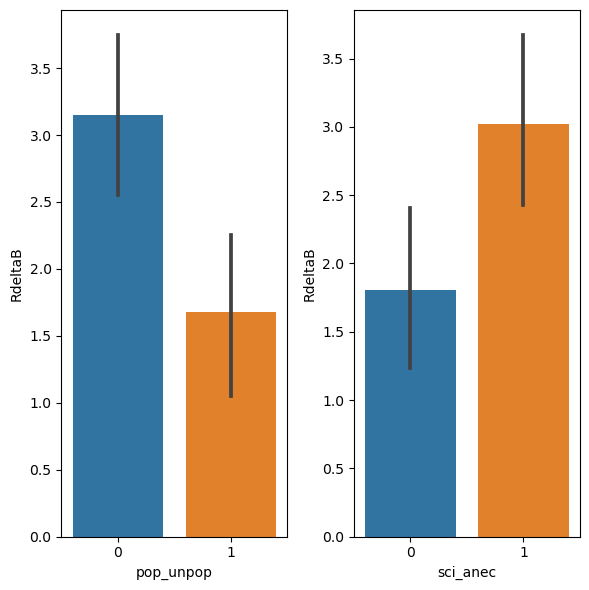

In [16]:
# First, let's look at the data split by the factors we care about

fig, ax = plt.subplots(1,2, figsize=(6,6))
sns.barplot(x='pop_unpop', y="RdeltaB", data=df, ax=ax[0])
sns.barplot(x='sci_anec', y="RdeltaB", data=df, ax=ax[1])
plt.tight_layout()

In [17]:
# Run the repeated measures ANOVA with 2 factors

pg.rm_anova(dv='RdeltaB', within=['sci_anec', 'pop_unpop'], subject='partnum', data=df)

C:\ALL\AppData\anaconda3\envs\mada_book\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
C:\ALL\AppData\anaconda3\envs\mada_book\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,sci_anec,331.694051,1,199,331.694051,6.816634,0.009719,0.009719,0.008120,1.0
1,pop_unpop,451.816861,1,199,451.816861,10.274243,0.001572,0.001572,0.011028,1.0
2,sci_anec * pop_unpop,29.490548,1,199,29.490548,0.930876,0.335806,0.335806,0.000727,1.0


Reporting result:

"We first ran a repeated measures analysis of variance (ANOVA) with rational belief update as
the dependent variable, and evidence type (anecdotal vs. scientific) and popularity (popular
vs. unpopular) as a within-subject variables, and found a main effect of evidence type
F(1, 199) = 6.81, p < .0098, ηp2 = 0.03 (i.e., such that statements followed by scientific evidence
changed more to align with the evidence (M = 3.03, SD = 7.36) than statements followed by
anecdotal evidence (M = 1.74, SD = 6.96); Figure 1a), and a main effect of popularity
F(1, 199) = 10.27, p < .0016, ηp2 = 0.04 (i.e., such that statements followed by popular evidence changed more to align with the evidence (M = 3.14, SD = 7.52) than statements followed by unpopular evidence (M = 1.64, SD = 6.76); Figure 1b), but no type by popularity
interaction F(1, 199) = 0.93, p = 0.336, ηp
2 = 0.005 (Figure 1c). Thus, we found support for our
first two hypotheses: that scientific evidence leads to more rational belief update than anecdotal
evidence, and that popular evidence leads to more rational belief update than unpopular
evidence."

Because there is no significant interaction between the 2 factors, we can't run additional posthoc t-tests to see in which of the 4 conditions participants changed their beliefs the most.

### Assumptions of repeated measures ANOVA:
1. Normal Distributions. RM anova is not very sensitive to departures of normality, so it’s usually not a problem.
2. Sphericity: defined mathematically in terms of the matrix of variances and covariances that apply to the various treatment levels and pairs of levels. So this is an assumption that variances of the differences between all possible pairs of within-subject conditions (i.e., levels of the independent variable) are equal. RM ANOVA is not robust to violations of sphericity. If sphericity is violated, you will get a large Type I error rate. Testing for violated sphericity: Mauchly’s test of sphericity

In [18]:
# run Mauchly’s test of sphericity
# the output is the p-value
# if the p value of this test is higher than 0.05 (non significant Mauchly) the data are ok! (data meet assumption of sphericity = variances of differences of independent variables are equal.)

pg.sphericity(dv='RdeltaB', within=['sci_anec', 'pop_unpop'], subject='partnum', data=df)[-1]

C:\ALL\AppData\anaconda3\envs\mada_book\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
C:\ALL\AppData\anaconda3\envs\mada_book\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


1.0

In [19]:
# if the Sphericity assumption is violated (so significant p-value on the Mauchly test above), report the Greenhouse–Geisser correction p-value:

pg.rm_anova(dv='RdeltaB', within=['sci_anec', 'pop_unpop'], subject='partnum', data=df)

C:\ALL\AppData\anaconda3\envs\mada_book\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
C:\ALL\AppData\anaconda3\envs\mada_book\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,sci_anec,331.694051,1,199,331.694051,6.816634,0.009719,0.009719,0.008120,1.0
1,pop_unpop,451.816861,1,199,451.816861,10.274243,0.001572,0.001572,0.011028,1.0
2,sci_anec * pop_unpop,29.490548,1,199,29.490548,0.930876,0.335806,0.335806,0.000727,1.0


## Mixed (between and within factors) ANOVA

Examining the effects of at least one between subjects factor and at least one within subjects factor on an outcome.

In [20]:
# Run the mixed ANOVA with one within and one between factors

aov = pg.mixed_anova(dv='RdeltaB', within='sci_anec', between='party', subject='partnum', data=df)
pg.print_table(aov)


ANOVA SUMMARY

Source            SS    DF1    DF2       MS      F    p-unc    np2      eps
-----------  -------  -----  -----  -------  -----  -------  -----  -------
party         82.269      2    197   41.134  1.091    0.338  0.011  nan
sci_anec     152.249      1    197  152.249  6.458    0.012  0.032    1.000
Interaction   36.751      2    197   18.376  0.779    0.460  0.008  nan



AttributeError: 'numpy.int64' object has no attribute 'startswith'

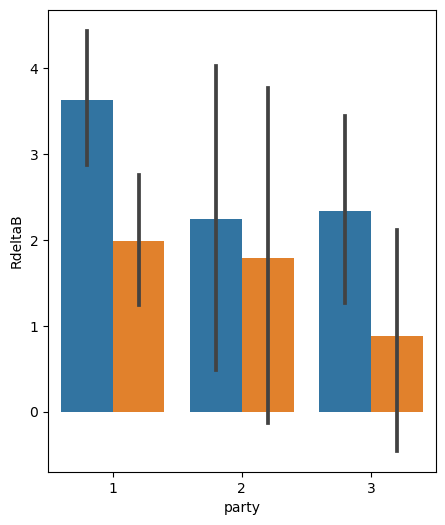

In [24]:
# Let's look at the data split by the within and between factors we care about

fig, ax = plt.subplots(1,1, figsize=(5,6))
sns.barplot(x='party', y="RdeltaB", hue='pop_unpop', data=df, ax=ax)

<Axes: xlabel='party', ylabel='RdeltaB'>

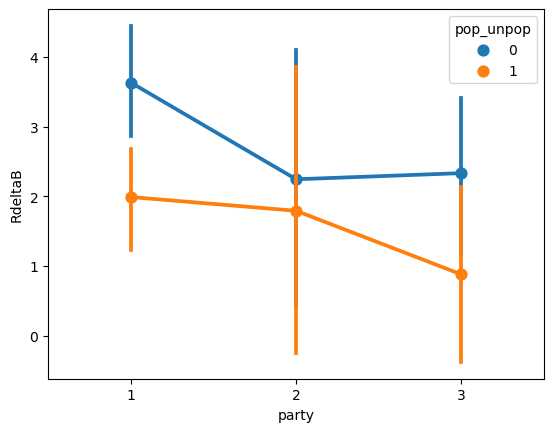

In [22]:
# another way of plotting this:
sns.pointplot(data=df, x="party", y="RdeltaB", hue="pop_unpop")

<Axes: xlabel='party', ylabel='RdeltaB'>

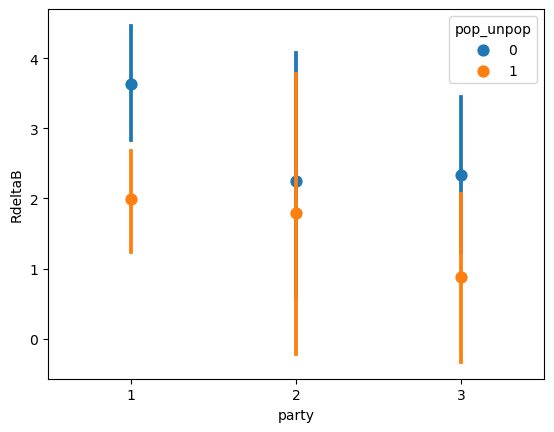

In [23]:
# if you don't want the points to be connected, add argument join=False
sns.pointplot(data=df, x="party", y="RdeltaB", hue="pop_unpop", join=False)

## ANOVA power analysis

Use this web version of the webpower R package: https://webpower.psychstat.org/wiki/models/index

Useful tool for converting effect sizes (d, r, f, η2): https://www.psychometrica.de/effect_size.html


## ANOVA versus Regression ?

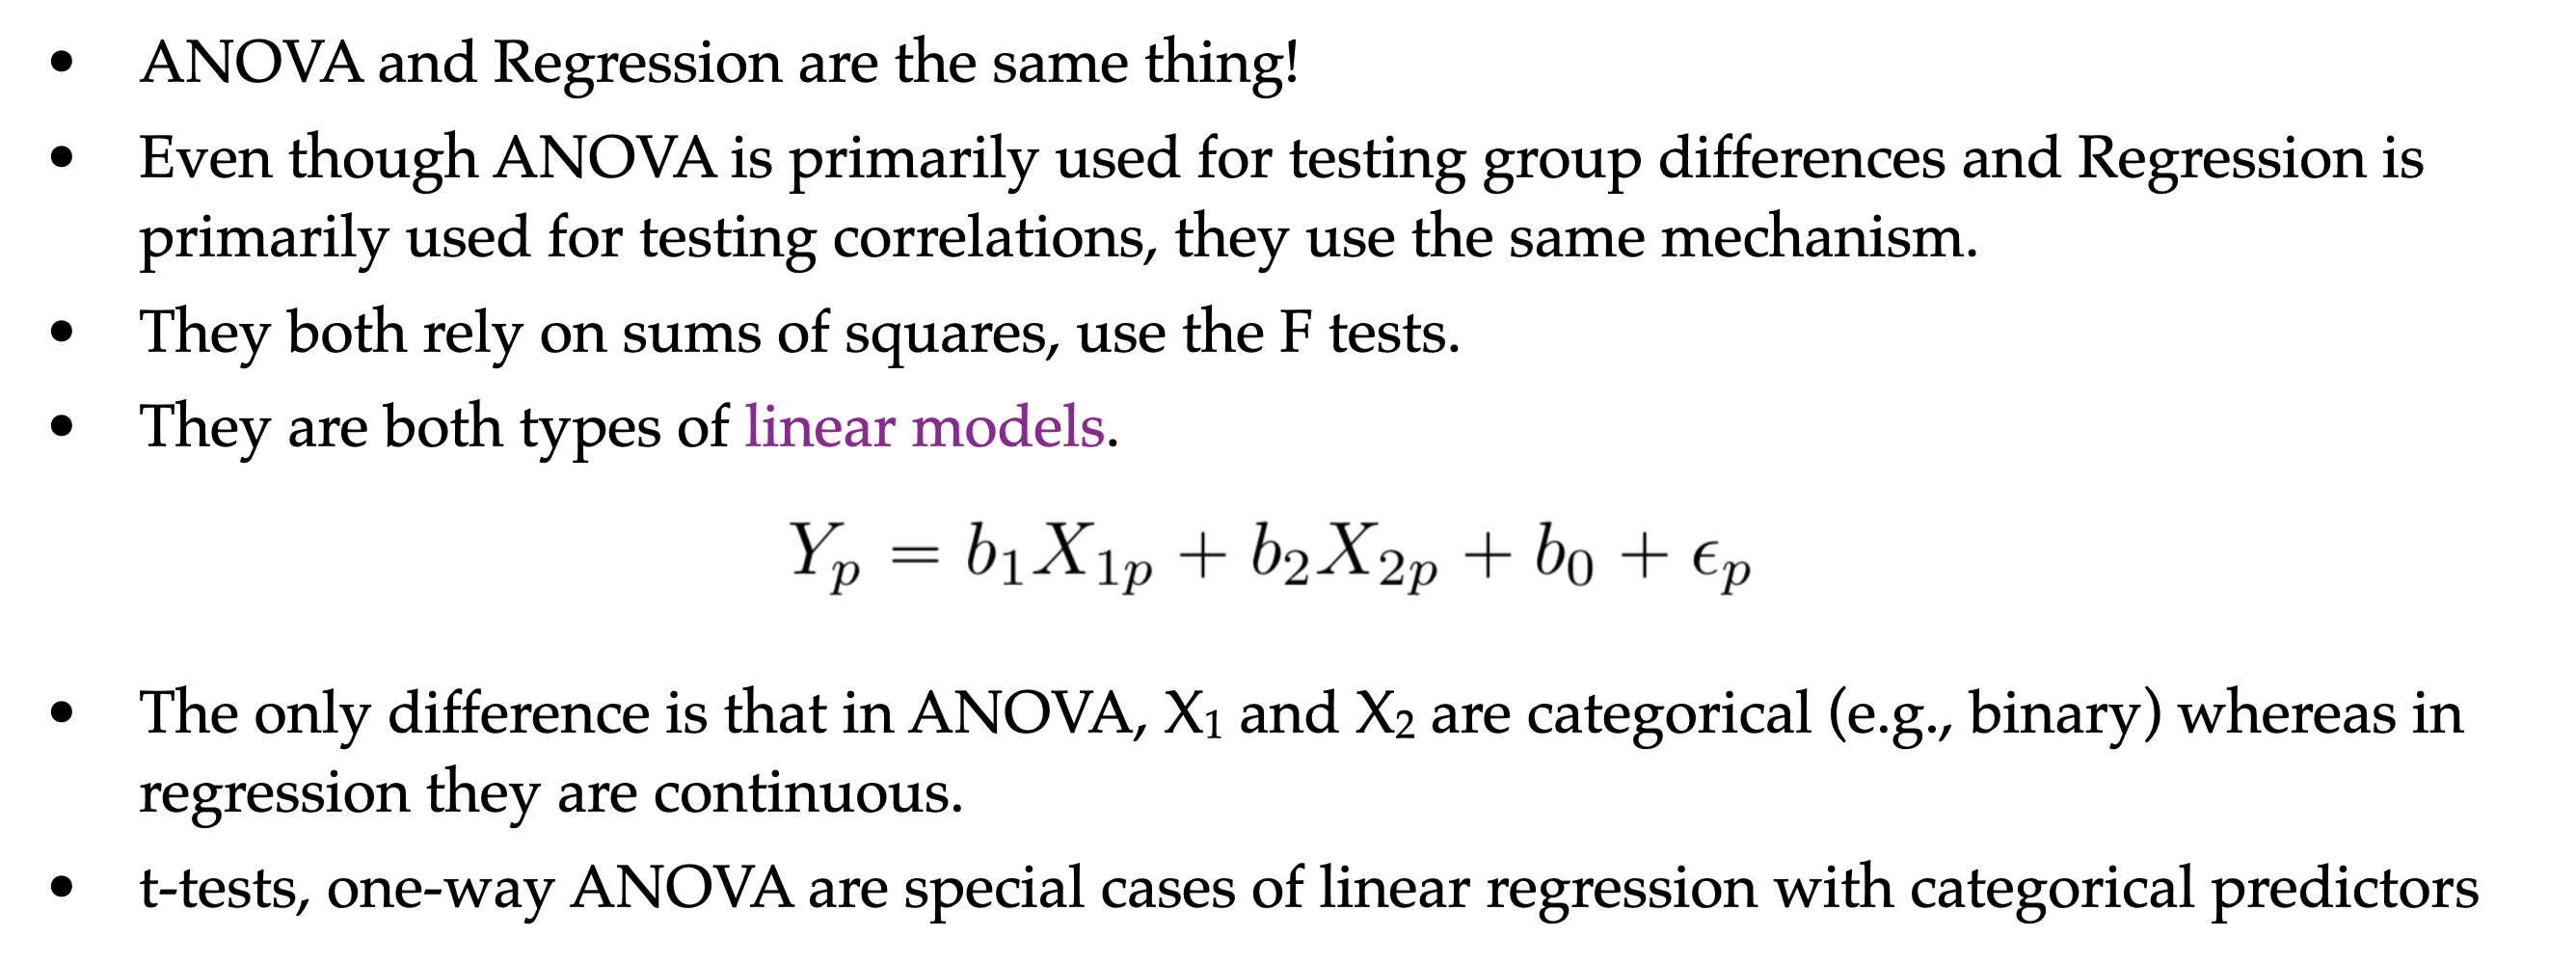